# Project: Mall Customer Segmentation and Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("./data/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
sns.set_theme(style="ticks", palette=None)

Text(0.5, 0.98, 'Fig 1.1: Histogram and sample distributions of customer attributes.')

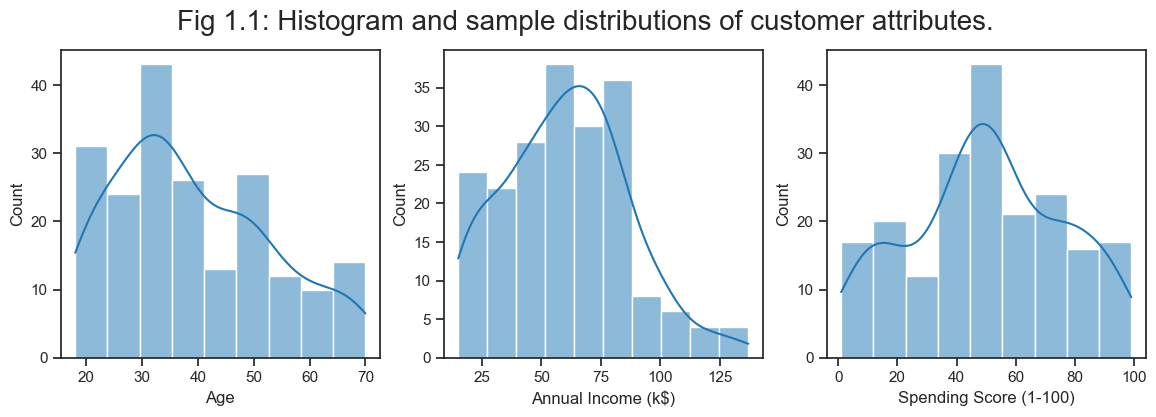

In [6]:
columns = df.columns.to_list()[2::]

fig = plt.figure(figsize=(14, 4))
ax  = fig.subplots(1,3)


for i in range(len(columns)):
    sns.histplot(data = df[columns[i]],
                kde = True,
                ax = ax[i]
                )
fig.suptitle("Fig 1.1: Histogram and sample distributions of customer attributes.", fontsize=20)
    

<ins>**Decription**</ins>: All three features (Age, Income, Spending Score) seems to be following a gaussian (normal) distributions.

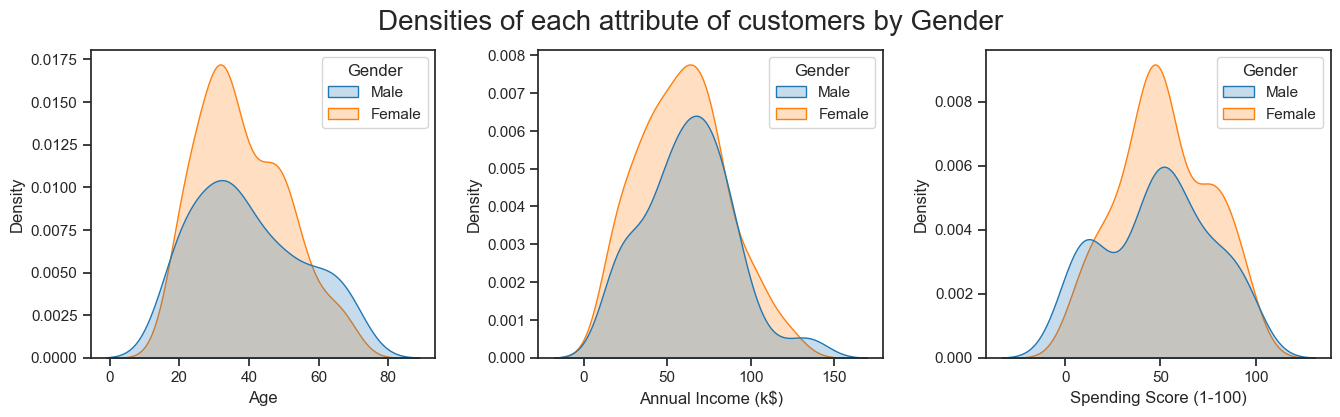

In [7]:
fig = plt.figure(figsize=(16,4))
ax = fig.subplots(1,3)

for i in range(len(columns)):
    sns.kdeplot(df, 
                x = columns[i], 
                hue="Gender", 
                fill=True, 
                ax=ax[i]
                )
fig.suptitle("Densities of each attribute of customers by Gender", fontsize=20);
fig.subplots_adjust(wspace=0.3)

<ins>**Density Differences by Gender**</ins>:
- Densities of Females are narrower, which usually is an indicator that there number is of female customers are more than male counterparts in dataset.

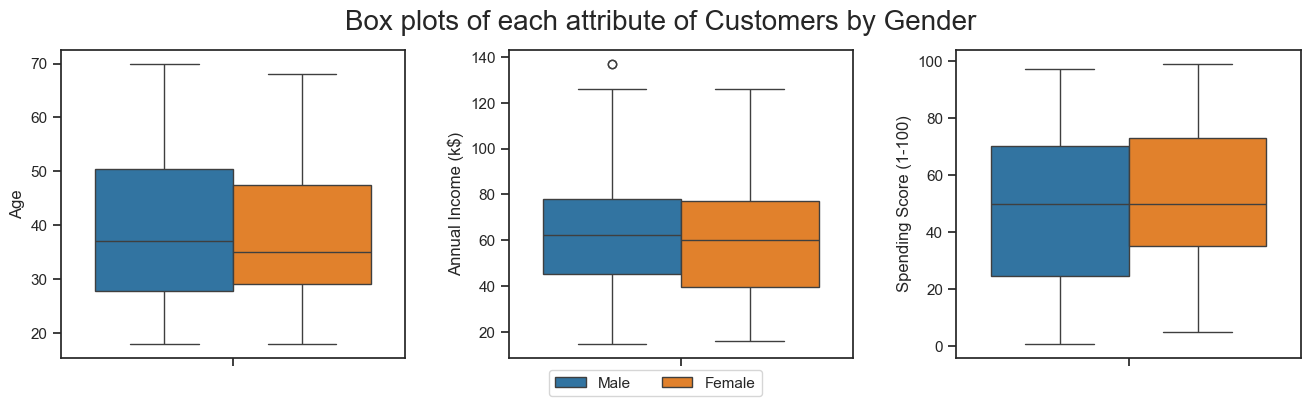

In [8]:
fig = plt.figure(figsize=(16,4))
ax = fig.subplots(1,3)
# h, l = ax.get_legend_handles_labels()

for i in range(len(columns)):
    sns.boxplot(
        df, 
        y = columns[i],
        hue="Gender",
        ax=ax[i], legend=False)
fig.legend({"Male": 'blue', "Female": "orange"}, loc = "lower center", ncols = 2);
fig.suptitle("Box plots of each attribute of Customers by Gender", fontsize=20);
fig.subplots_adjust(wspace=0.3)
    

<ins>**Boxplots**</ins>:
- There are not too many outliers, only outlier can be detected at Attribute of Annual Income for males.

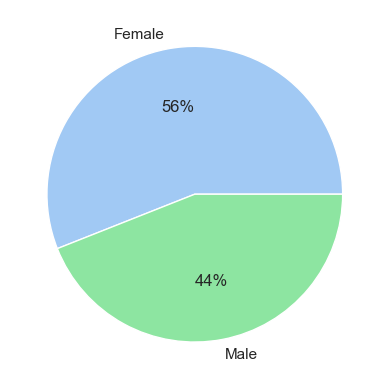

In [9]:
data = df["Gender"].value_counts(normalize=True).values
keys = df["Gender"].value_counts(normalize=True).index

palette_col = sns.color_palette("pastel6")
plt.pie(x=data, labels = keys, colors=palette_col, autopct="%.0f%%");

# Bivariate Analysis

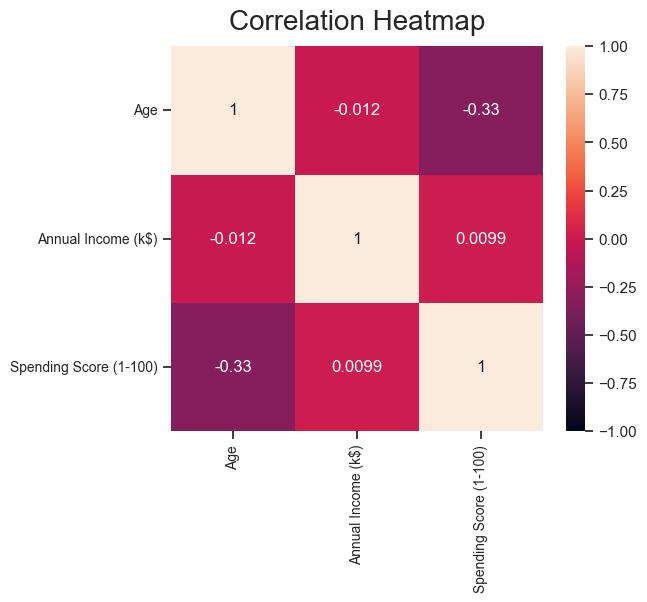

In [10]:
plt.figure(figsize=(6,5))

hmap = sns.heatmap(df[columns].corr(), vmin=-1, vmax=1, annot=True) # , cmap='coolwarm')

hmap.set_title("Correlation Heatmap", fontdict={'fontsize':20}, pad=12)
hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize = 10);
hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize = 10);

<ins>**Correlation**</ins>:
- **Strong negative correlation** between <ins>Age</ins> and <ins>Spending Score</ins> of a customer. This shows that older the customer, the less her/his Spending Score will be.
- **Positive correlation** (0.01) between <ins>Annual Income</ins> and <ins>Spending Score</ins>. This is intuitive as higher the income, the higher the spending is to be.

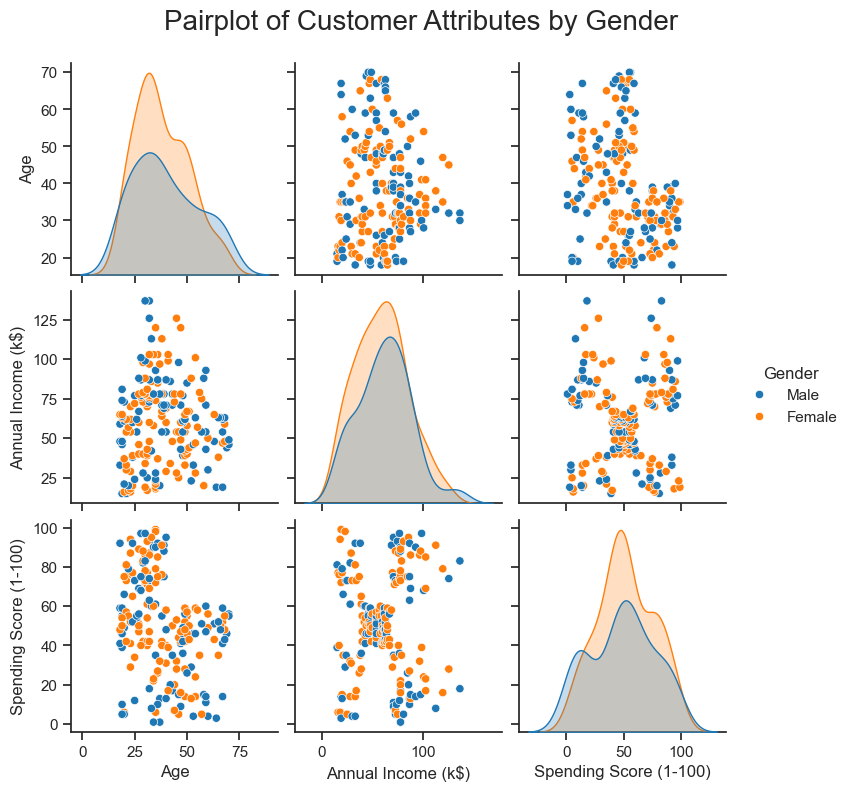

In [11]:

pplot = sns.pairplot(df[df.columns[1:]], hue="Gender");
pplot.figure.suptitle("Pairplot of Customer Attributes by Gender", y = 1.05, fontsize = 20);

In [12]:
df[df.columns[1::]].groupby(["Gender"])[columns].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


There is no visible separation between male and female customers in attribute pairplots.
However, there is an interesting pattern that catches an eye in Scatterplot of Annual Income against Spending Score.
Additionally, there is some structure bwteen Age and Spending Score.

- Let's take a closer look.

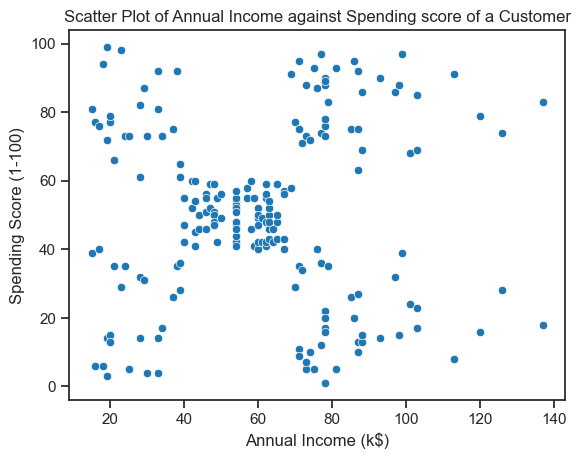

In [13]:
scat = sns.scatterplot(df[columns], x="Annual Income (k$)", y = "Spending Score (1-100)")
scat.set_title("Scatter Plot of Annual Income against Spending score of a Customer", fontdict={'fontsize':12});

# Clustering

## Univariate clustering

In [20]:
base_kmeans = KMeans()

In [21]:
base_kmeans.fit(df[["Annual Income (k$)"]])

KMeans()

In [22]:
base_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [24]:
df['Income Clusters'] = base_kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [25]:
df['Income Clusters'].value_counts()

Income Clusters
4    36
2    36
1    30
6    26
7    26
0    24
5    14
3     8
Name: count, dtype: int64

In [26]:
base_kmeans.inertia_

3141.653601953602

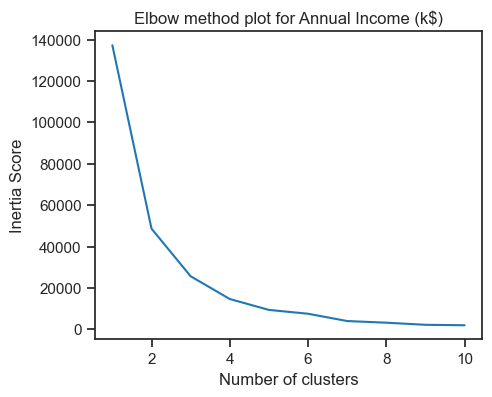

In [31]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(5,4))
plt.plot(list(range(1,11)), inertia_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia Score")
plt.title("Elbow method plot for Annual Income (k$)");

Analysing clusters:

In [33]:
cluster_n3 = KMeans(n_clusters=3)
cluster_n3.fit(df[["Annual Income (k$)"]])
df["Income Clusters"] = cluster_n3.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [42]:
df.groupby("Income Clusters")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Clusters,,,
0,36.910714,92.142857,50.517857
1,41.279070,60.906977,50.337209
2,37.120690,29.551724,49.689655


There is not much information/structure in Annual Income of Customers, which can be useful for segmentation.

## Bivariate clustering

In [43]:
cluster_2d = KMeans()
cluster_2d.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])

KMeans()

In [44]:
df["Income Spending Clusters"] = cluster_2d.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income Spending Clusters
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,0


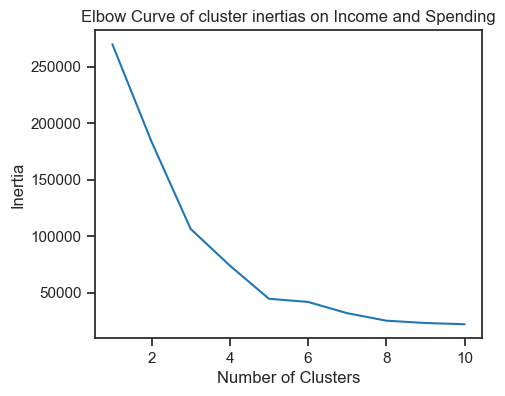

In [47]:
inertia_scores2 = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_scores2.append(kmean.inertia_)

plt.figure(figsize=(5,4))
plt.plot(range(1,11),inertia_scores2)
plt.title("Elbow Curve of cluster inertias on Income and Spending")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");


Elbow curve indicates optimal number of clusters when n = 5.

In [48]:
cluster_2d = KMeans(n_clusters=5)
cluster_2d.fit(df[["Annual Income (k$)", "Spending Score (1-100)"]])
df["Income Spending Clusters"] = cluster_2d.labels_

In [52]:
df.groupby(["Income Spending Clusters"])[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Spending Clusters,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


We can already see a clear separation in Income and Spending Score Cluster Centers.

We need to visualise to have a better imagination.

In [56]:
centers_2d = pd.DataFrame(cluster_2d.cluster_centers_, columns=["x", "y"])
centers_2d

,x,y
0,86.538462,82.128205
1,55.296296,49.518519
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


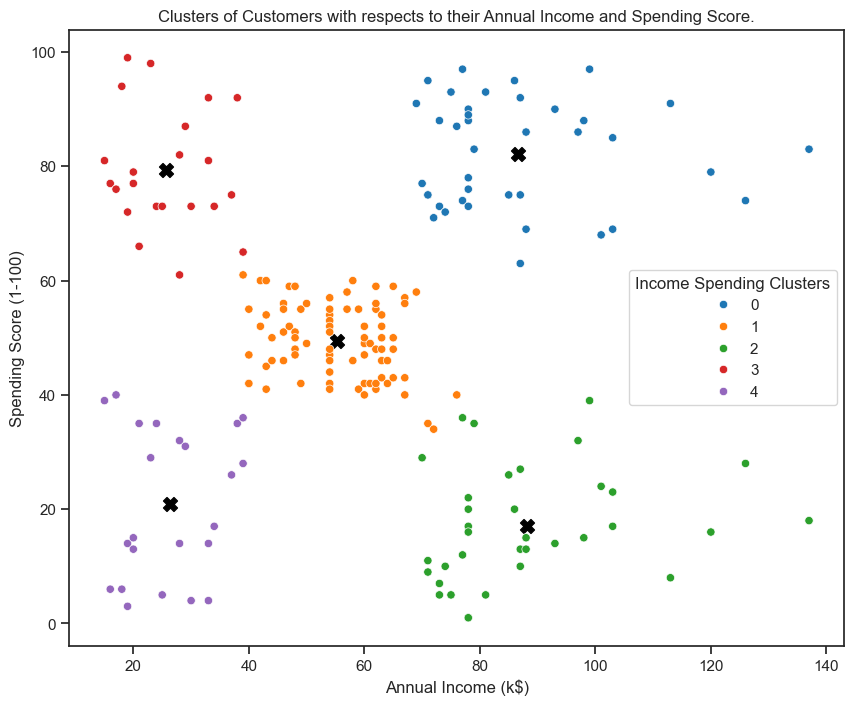

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers_2d["x"], y=centers_2d["y"], s=100, marker="X", c = "k")
sns.scatterplot(df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Income Spending Clusters", palette="tab10")
plt.title("Clusters of Customers with respects to their Annual Income and Spending Score.");
# plt.savefig('bivariate_clustering.png')

In [72]:
pd.crosstab(df["Income Spending Clusters"], df["Gender"], normalize='index')

Gender,Female,Male
Income Spending Clusters,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [73]:
df.groupby("Income Spending Clusters")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Spending Clusters,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


- Cluster 0, especially 1, 3, and 4 are female dominated.
- Cluster 2 is onl dominated by males. They earn more but do not spend a lot.

 **Cluster 0** is attractive group of customers, because they earn a lot and spend a lot. Average age of group is 33.

**Cluster 3** has higher spending score, although they do not earn much. Average age of this Customer cluster is 25 years. They possibly buy a lot when there are sales

## Multivariate Clustering

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income Spending Clusters
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,4


In [94]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
onehot_enc = encoder.fit_transform(df[["Gender"]])
onehot_df = pd.DataFrame(onehot_enc.toarray(), columns=encoder.get_feature_names_out(), dtype=int)
onehot_df

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [109]:
df_encoded = pd.concat([df, onehot_df], axis=1)
df_encoded.drop(columns=["Gender_Female", "Gender", "Income Clusters", "Income Spending Clusters", "CustomerID"], inplace=True)
df_encoded

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [112]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_encoded_scaled = pd.DataFrame(df_scaled) # columns=scaler.get_feature_names_out())
df_encoded_scaled

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


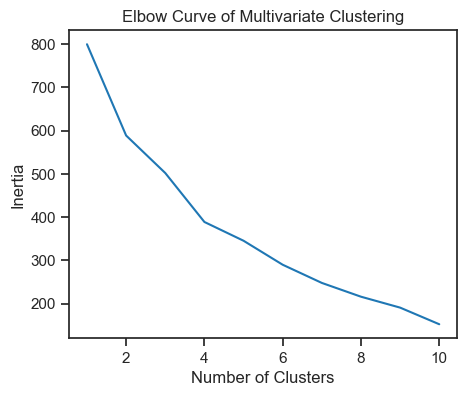

In [121]:
inertia_scores3 = []
for i in range(1, 11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df_encoded_scaled)
    inertia_scores3.append(kmean.inertia_)

plt.figure(figsize=(5,4))
plt.plot(range(1,11),inertia_scores3)
plt.title("Elbow Curve of Multivariate Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

# Visualisation

In [123]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income Spending Clusters
0,1,Male,19,15,39,2,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,0,2
197,198,Male,32,126,74,0,0
198,199,Male,32,137,18,0,2


We need to save Income Spending Clusters in order to make Visiualisations. Clusters found on Scatterplot of Income against Spending Score were the most prominent and had structure.

In [124]:
df.to_csv("Clustering_Income_Spending.csv")

In [126]:
# to save plot code after plt
# plt.savefig('bivariate_clustering.png')

# Takeaway & Analysis

Analysis as above at bivariate clustering.

Takeaway: we may use clustering and go into CustomerID and if we can JOIN this data with Purchased Items, we can create a marketing campaign for our targeted Clusters:
- Cluster 1
- Cluster 3